# Customer Data Processing

## Objective:
- To format and store the data in different formats (.json, etc)
- To compute and add extra feature to the data based on the relationship between other features in the data.
- Visualize the data set.

# Task 1:
---

- Importing Libraries needed:

In [1]:
import csv
import json
import numpy as np

## Question 1:

- Creating a variable for the file path:

In [2]:
file_name = 'acw_user_data.csv'
file_folder_path = 'C://Users/ohiom/Documents/My work space/Hull/Module 1/Project'
full_file_path = file_folder_path + '/' + file_name
full_file_path

'C://Users/ohiom/Documents/My work space/Hull/Module 1/Project/acw_user_data.csv'

- Reading in the CSV file with the file path created:

In [3]:
#Opening and reading the file in read mode:
with open(full_file_path, mode='r') as user_data:
    file = csv.reader(user_data, delimiter=',')
    for samples in file:
        print(samples)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N 1G

## Question 2.

- Casting values to respective data types:

In [4]:
#Casting the numbers from string to integers and float, excluding the first row.

list_header = []
list_no_header = []

with open(full_file_path, mode='r') as user_data:
    data = csv.reader(user_data, delimiter=',')
    for entry_num,entry in enumerate(data):
        if entry_num==0:
            list_header.append(entry)
        else:
            entry_cast = []          
            for sample_num,sample in enumerate(entry):
                if sample_num==3 or sample_num==8 or sample_num==9 or sample_num==10 or sample_num==15 or sample_num==17 or sample_num==21:
                    if sample=='' or sample==' ':
                        sample= np.nan    #Replaced the empty string with NaN
                    elif sample == 'N/A':
                        sample=sample
                    else:
                        sample = int(sample)
                elif sample_num==4:
                    sample=float(sample)
                elif sample=='True':
                    sample=bool(sample)
                elif sample=='False':
                    sample=bool('') 
                else:
                    sample=sample
                entry_cast.append(sample) 
            list_no_header.append(entry_cast)

#Returning only first list entry:
print(list_header[0])
print('\n')
print(list_no_header[0])

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


['70 Lydia isle', 'Lake Conor', 'S71 7XZ', 89, 0.0, 'N/A', '08/18', '11/27', 676373692463, 875, 3, 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', 7257, True, 72838, 'Male', 'Hyundai', 'Bonneville', 2009, 'Pickup']


#### Obtaining a list of the headers:
   - Headers will represent keys for building the dictionaries.

In [5]:
header_features = list_header[0]
print(header_features)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


 #### Creating a list of dictionaries:

In [6]:
#Creating a list of each entry represented in a dictionary:

dict_list = []
for entry_index,item in enumerate(list_no_header):
    dict_item = {}
    for header_index,title in enumerate(header_features):
        dict_item[header_features[header_index]]=list_no_header[entry_index][header_index]
    dict_list.append(dict_item)
    
#Returning only first list entry:
dict_list[0]  

{'Address Street': '70 Lydia isle',
 'Address City': 'Lake Conor',
 'Address Postcode': 'S71 7XZ',
 'Age (Years)': 89,
 'Distance Commuted to Work (miles)': 0.0,
 'Employer Company': 'N/A',
 'Credit Card Start Date': '08/18',
 'Credit Card Expiry Date': '11/27',
 'Credit Card Number': 676373692463,
 'Credit Card CVV': 875,
 'Dependants': 3,
 'First Name': 'Kieran',
 'Bank IBAN': 'GB62PQKB71416034141571',
 'Last Name': 'Wilson',
 'Marital Status': 'married or civil partner',
 'Yearly Pension (GBP)': 7257,
 'Retired': True,
 'Yearly Salary (GBP)': 72838,
 'Sex': 'Male',
 'Vehicle Make': 'Hyundai',
 'Vehicle Model': 'Bonneville',
 'Vehicle Year': 2009,
 'Vehicle Type': 'Pickup'}

### Creating sub-dictionaries for Address, Credit and Vehicle from list of dictionaries (dict_list) above:

In [7]:
dict_list_grouped = []

for entry_dict in dict_list:
    address_list = ['Address Street','Address City','Address Postcode']
    credit_list = ['Credit Card Start Date','Credit Card Expiry Date','Credit Card Number','Credit Card CVV','Bank IBAN']
    vehicle_list = ['Vehicle Make','Vehicle Model','Vehicle Year','Vehicle Type']
    
    grouped_dict={}
    for keys in entry_dict:
        if keys in address_list:
            address_dict={}
            for address in address_list: 
                address_dict[address]=entry_dict[address]
                grouped_dict['Address']=address_dict
        elif keys in credit_list:
            credit_dict = {}
            for credit in credit_list:        
                credit_dict[credit]=entry_dict[credit]
                grouped_dict['Credit']=credit_dict
        elif keys in vehicle_list:
            vehicle_dict={}
            for vehicle in vehicle_list:
                vehicle_dict[vehicle]=entry_dict[vehicle]
                grouped_dict['Vehicle']=vehicle_dict
        else:
            grouped_dict[keys]=entry_dict[keys]
    dict_list_grouped.append(grouped_dict)
    
dict_list_grouped   

[{'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'},
  'Age (Years)': 89,
  'Distance Commuted to Work (miles)': 0.0,
  'Employer Company': 'N/A',
  'Credit': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Number': 676373692463,
   'Credit Card CVV': 875,
   'Bank IBAN': 'GB62PQKB71416034141571'},
  'Dependants': 3,
  'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 7257,
  'Retired': True,
  'Yearly Salary (GBP)': 72838,
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': 2009,
   'Vehicle Type': 'Pickup'}},
 {'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Age (Years)': 46,
  'Distance Commuted to Work (miles)': 13.72,
  'Employer Company': 'Begum-Williams',
  'Credit': {'Cred

## Question 3

### Obtaining row positions where the value of dependants is "   ".
- Building a function called error_index_fun() to return a list containing the location of error:

In [8]:
def error_index_func():
    error_position = []
    for entry_position,entries in enumerate(list_no_header):
        for values in entries:
            if values is np.nan:
                error_position.append(entry_position)
    return error_position

In [9]:
print('List of Problematic rows for Dependants are:',error_index_func())

List of Problematic rows for Dependants are: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


## Question 4

### Writing records to a processed.json file:

In [10]:
#Creating and writing to a json file
with open('processed.json', mode='w') as new_file:
    json.dump(dict_list_grouped,new_file)

with open('processed.json', mode='r') as new_file:
    processed = json.load(new_file)
processed

[{'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'},
  'Age (Years)': 89,
  'Distance Commuted to Work (miles)': 0.0,
  'Employer Company': 'N/A',
  'Credit': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Number': 676373692463,
   'Credit Card CVV': 875,
   'Bank IBAN': 'GB62PQKB71416034141571'},
  'Dependants': 3,
  'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 7257,
  'Retired': True,
  'Yearly Salary (GBP)': 72838,
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': 2009,
   'Vehicle Type': 'Pickup'}},
 {'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Age (Years)': 46,
  'Distance Commuted to Work (miles)': 13.72,
  'Employer Company': 'Begum-Williams',
  'Credit': {'Cred

## Question 5.

### Creating  and storing retired and employed entries in retired.json and employed.json files respectively.

- Building s list containing the selected entries from the data:

In [11]:
retired_list = [entry for entry in dict_list_grouped if entry['Retired']==True]
employed_list = [entry for entry in dict_list_grouped if entry['Employer Company']!='N/A']

- Creating and saving the retired list files in .json format:

In [12]:
with open('retired.json', mode='w') as retired:
    json.dump(retired_list, retired)
with open('retired.json', mode='r') as retired:
    retired = json.load(retired)
retired

[{'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'},
  'Age (Years)': 89,
  'Distance Commuted to Work (miles)': 0.0,
  'Employer Company': 'N/A',
  'Credit': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Number': 676373692463,
   'Credit Card CVV': 875,
   'Bank IBAN': 'GB62PQKB71416034141571'},
  'Dependants': 3,
  'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 7257,
  'Retired': True,
  'Yearly Salary (GBP)': 72838,
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': 2009,
   'Vehicle Type': 'Pickup'}},
 {'Address': {'Address Street': '81 Goodwin dam',
   'Address City': 'Griffinstad',
   'Address Postcode': 'G3 7ZX'},
  'Age (Years)': 67,
  'Distance Commuted to Work (miles)': 0.0,
  'Employer Company': 'N/A',
  'Credit': {'Credit Card Start 

- Creating and saving the employed list files in .json format:

In [13]:
with open('employed.json', mode='w') as employed:
    json.dump(employed_list, employed)
with open('employed.json', mode='r') as employed:
    employed = json.load(employed)
employed

[{'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Age (Years)': 46,
  'Distance Commuted to Work (miles)': 13.72,
  'Employer Company': 'Begum-Williams',
  'Credit': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Credit Card Number': 4529436854129855,
   'Credit Card CVV': 583,
   'Bank IBAN': 'GB37UMCO54540228728019'},
  'Dependants': 1,
  'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 0,
  'Retired': False,
  'Yearly Salary (GBP)': 54016,
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': 1996,
   'Vehicle Type': 'Coupe'}},
 {'Address': {'Address Street': 'Studio 33K Joel walk',
   'Address City': 'Randallborough',
   'Address Postcode': 'ME3N 1GH'},
  'Age (Years)': 22,
  'Distance Commuted to Work (miles)': 16.02,
  'Employer Company': 'Hill-Wright',
 

## Question 6

- Building a function to return index positions of entries with credit card start and end date difference greater that 10 years:

In [14]:
def remove_card():
    list_remove = []
    for i,item in enumerate(list_no_header):
        credit_start = item[6]
        credit_end = item[7]
        year_start = int(credit_start.split('/')[1])
        year_end = int(credit_end.split('/')[1])
        year_difference = year_end - year_start
        if year_difference > 10:
            index = i
            list_remove.append(index)
    return list_remove

In [15]:
print('FLAGGED rows: ',remove_card())

FLAGGED rows:  [1, 6, 7, 15, 23, 30, 34, 35, 40, 41, 51, 55, 56, 63, 68, 72, 75, 76, 81, 85, 86, 87, 91, 101, 106, 113, 114, 117, 122, 133, 134, 137, 142, 147, 155, 164, 168, 178, 179, 182, 190, 198, 201, 220, 226, 229, 230, 235, 247, 251, 252, 261, 265, 271, 276, 281, 286, 287, 298, 305, 308, 310, 311, 313, 317, 318, 319, 321, 327, 328, 330, 331, 344, 349, 351, 362, 364, 370, 377, 389, 390, 391, 393, 396, 399, 403, 408, 412, 413, 418, 422, 424, 433, 434, 438, 446, 449, 452, 454, 464, 468, 474, 476, 481, 492, 497, 498, 500, 504, 505, 507, 511, 512, 514, 516, 520, 528, 530, 531, 540, 551, 552, 554, 564, 573, 586, 588, 594, 596, 599, 604, 606, 607, 622, 626, 627, 630, 643, 647, 655, 658, 663, 664, 670, 673, 694, 698, 709, 712, 715, 716, 719, 721, 737, 742, 749, 750, 752, 755, 756, 761, 767, 769, 776, 778, 779, 780, 781, 782, 784, 786, 791, 792, 795, 800, 805, 808, 814, 815, 816, 824, 826, 829, 842, 857, 858, 860, 875, 876, 879, 880, 895, 897, 898, 899, 900, 901, 906, 909, 912, 913, 920, 

- Using index positions to generate a list containing all flagged entry:

In [16]:
flagged_dict_list = [info for num,info in enumerate(dict_list_grouped) if num in remove_card()]
flagged_dict_list

[{'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Age (Years)': 46,
  'Distance Commuted to Work (miles)': 13.72,
  'Employer Company': 'Begum-Williams',
  'Credit': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Credit Card Number': 4529436854129855,
   'Credit Card CVV': 583,
   'Bank IBAN': 'GB37UMCO54540228728019'},
  'Dependants': 1,
  'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 0,
  'Retired': False,
  'Yearly Salary (GBP)': 54016,
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': 1996,
   'Vehicle Type': 'Coupe'}},
 {'Address': {'Address Street': '24 Heather locks',
   'Address City': 'New Mathew',
   'Address Postcode': 'WD10 1LX'},
  'Age (Years)': 43,
  'Distance Commuted to Work (miles)': 20.05,
  'Employer Company': 'Clark Group',
  'Credit

- #### Creating and storing the flagged list in a remove_ccard.json file:

In [17]:
with open('remove_ccard.json', mode='w') as card_remove:
    json.dump(flagged_dict_list, card_remove)
    
with open('remove_ccard.json', mode='r') as card_remove:
    removed_card_list = json.load(card_remove)
removed_card_list

[{'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Age (Years)': 46,
  'Distance Commuted to Work (miles)': 13.72,
  'Employer Company': 'Begum-Williams',
  'Credit': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Credit Card Number': 4529436854129855,
   'Credit Card CVV': 583,
   'Bank IBAN': 'GB37UMCO54540228728019'},
  'Dependants': 1,
  'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 0,
  'Retired': False,
  'Yearly Salary (GBP)': 54016,
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': 1996,
   'Vehicle Type': 'Coupe'}},
 {'Address': {'Address Street': '24 Heather locks',
   'Address City': 'New Mathew',
   'Address Postcode': 'WD10 1LX'},
  'Age (Years)': 43,
  'Distance Commuted to Work (miles)': 20.05,
  'Employer Company': 'Clark Group',
  'Credit

## Question 7

Creating and computing values for a new item, "Salary-Commute".

#### Question 7a:

- Adding the new item, "Salary-Commute" to the data:

In [18]:
with open('processed.json', mode='r') as new_file:
    new_info = json.load(new_file)
for item in new_info:
    salary = item['Yearly Salary (GBP)']
    mile = item['Distance Commuted to Work (miles)']
    if mile==1 or mile<1:
        sal_mile = salary
    else:
        sal_mile = round(salary / mile, 2)
    item['Salary-Commute']=sal_mile
new_info[0]

{'Address': {'Address Street': '70 Lydia isle',
  'Address City': 'Lake Conor',
  'Address Postcode': 'S71 7XZ'},
 'Age (Years)': 89,
 'Distance Commuted to Work (miles)': 0.0,
 'Employer Company': 'N/A',
 'Credit': {'Credit Card Start Date': '08/18',
  'Credit Card Expiry Date': '11/27',
  'Credit Card Number': 676373692463,
  'Credit Card CVV': 875,
  'Bank IBAN': 'GB62PQKB71416034141571'},
 'Dependants': 3,
 'First Name': 'Kieran',
 'Last Name': 'Wilson',
 'Marital Status': 'married or civil partner',
 'Yearly Pension (GBP)': 7257,
 'Retired': True,
 'Yearly Salary (GBP)': 72838,
 'Sex': 'Male',
 'Vehicle': {'Vehicle Make': 'Hyundai',
  'Vehicle Model': 'Bonneville',
  'Vehicle Year': 2009,
  'Vehicle Type': 'Pickup'},
 'Salary-Commute': 72838}

#### Question 7b:

- Sorting the new file data with "Salary-Commute" in ascending order:

In [19]:
def sort_salary_commute(item):
    return item['Salary-Commute']
sorted_file = sorted(new_info, key=sort_salary_commute)
sorted_file

[{'Address': {'Address Street': 'Studio 9 Reid lights',
   'Address City': 'South Ryan',
   'Address Postcode': 'E27 9GY'},
  'Age (Years)': 52,
  'Distance Commuted to Work (miles)': 5.52,
  'Employer Company': 'Smith, Birch and Burke',
  'Credit': {'Credit Card Start Date': '06/14',
   'Credit Card Expiry Date': '04/29',
   'Credit Card Number': 4713424668774153,
   'Credit Card CVV': 3053,
   'Bank IBAN': 'GB09ELJH35362236053720'},
  'Dependants': 2,
  'First Name': 'Graeme',
  'Last Name': 'Jackson',
  'Marital Status': 'single',
  'Yearly Pension (GBP)': 0,
  'Retired': False,
  'Yearly Salary (GBP)': 17046,
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Chevrolet',
   'Vehicle Model': 'Rally Wagon 1500',
   'Vehicle Year': 2011,
   'Vehicle Type': 'SUV'},
  'Salary-Commute': 3088.04},
 {'Address': {'Address Street': 'Studio 34r Wilkinson camp',
   'Address City': 'Louisland',
   'Address Postcode': 'G7H 8FA'},
  'Age (Years)': 30,
  'Distance Commuted to Work (miles)': 5.64,
  '

#### Question 7c:

- Saving the newly sorted file to commute.json:

In [20]:
with open('commute.json', mode='w') as commute:
    json.dump(sorted_file, commute)
    
with open('commute.json', mode='r') as commute:
    commute_file = json.load(commute)
commute_file

[{'Address': {'Address Street': 'Studio 9 Reid lights',
   'Address City': 'South Ryan',
   'Address Postcode': 'E27 9GY'},
  'Age (Years)': 52,
  'Distance Commuted to Work (miles)': 5.52,
  'Employer Company': 'Smith, Birch and Burke',
  'Credit': {'Credit Card Start Date': '06/14',
   'Credit Card Expiry Date': '04/29',
   'Credit Card Number': 4713424668774153,
   'Credit Card CVV': 3053,
   'Bank IBAN': 'GB09ELJH35362236053720'},
  'Dependants': 2,
  'First Name': 'Graeme',
  'Last Name': 'Jackson',
  'Marital Status': 'single',
  'Yearly Pension (GBP)': 0,
  'Retired': False,
  'Yearly Salary (GBP)': 17046,
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Chevrolet',
   'Vehicle Model': 'Rally Wagon 1500',
   'Vehicle Year': 2011,
   'Vehicle Type': 'SUV'},
  'Salary-Commute': 3088.04},
 {'Address': {'Address Street': 'Studio 34r Wilkinson camp',
   'Address City': 'Louisland',
   'Address Postcode': 'G7H 8FA'},
  'Age (Years)': 30,
  'Distance Commuted to Work (miles)': 5.64,
  '

# Task Two:

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Reading in the the CSV file:

In [22]:
record = pd.read_csv(full_file_path)
record

Address Street    Address City Address Postcode  Age (Years)  \
0                70 Lydia isle      Lake Conor          S71 7XZ           89   
1             00 Wheeler wells      Chapmanton           L2 7BT           46   
2         Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3    Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4       Flat 3 Christine views    Fletcherstad          WS2 9SN           57   
..                         ...             ...              ...          ...   
995   Studio 6 Heather prairie    North Amelia           E9 0HB           48   
996          Flat 3 Davies run      Greenshire           E7 4UJ           22   
997     Flat 7 Barber motorway    Burrowsshire          L62 8TA           38   
998              00 Tony forks       Abbiebury          NP4 1JL           45   
999       Flat 9 Mohamed route       West Glen         LL3M 4WS           80   

     Distance Commuted to Work (miles)          Employer Company  \
0                                 0.00                       NaN   
1                                13.72            Begum-Williams   
2                                16.02               Hill-Wright   
3                                19.35                 Green LLC   
4                                 5.94  Hill, Evans and Harrison   
..                                 ...                       ...   
995                              18.44             Phillips-Pope   
996                              19.61                Hughes LLC   
997                               6.66              Bailey Group   
998                              18.13              Foster-Price   
999                               0.00                       NaN   

    Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                    08/18                   11/27         676373692463   
1                    08/12                   11/26     4529436854129855   
2                    11/19                   07/27  4091726363083888495   
3                    10/17                   04/18  4671332769487632633   
4                    04/19                   11/27     2245094149128526   
..                     ...                     ...                  ...   
995                  04/19                   08/26     3563802099155576   
996                  05/12                   07/28     3591311819315276   
997                  01/13                   05/29     3584931475767707   
998                  04/19                   05/23     4090311300716168   
999                  12/14                   01/16      180020306382110   

     Credit Card CVV  ...  Last Name            Marital Status  \
0                875  ...     Wilson  married or civil partner   
1                583  ...     Thomas  married or civil partner   
2                422  ...      Jones  married or civil partner   
3                669  ...       Shaw  married or civil partner   
4                659  ...    O'Brien  married or civil partner   
..               ...  ...        ...                       ...   
995              908  ...      Clark  married or civil partner   
996              675  ...      Jones  married or civil partner   
997              679  ...     Walker                    single   
998              775  ...    Thomson  married or civil partner   
999              903  ...    Russell                    single   

    Yearly Pension (GBP) Retired Yearly Salary (GBP)     Sex  Vehicle Make  \
0                   7257    True               72838    Male       Hyundai   
1                      0   False               54016    Male        Nissan   
2                      0   False               68049    Male           GMC   
3                      0   False               91337    Male         Scion   
4                      0   False               18446  Female         Buick   
..                   ...     ...                 ...     ...           ...  

## Question 1:

### Question 1a:

In [23]:
salary = record['Yearly Salary (GBP)']
print(salary)
print('\n')
mean_salary = salary.mean()
print(f'The Mean Salary is: {mean_salary} (GBP)')

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64


The Mean Salary is: 57814.078 (GBP)


### Question 1b:

In [24]:
age = record['Age (Years)']
print(age)
print('\n')
median_age = age.median()
print(f'The Mean Age is: {median_age} years')

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64


The Mean Age is: 54.0 years


## Question 2:

In [25]:
# Adding percent or count to plots:
def plot_percent_weight(plot_name,data,feature,show_value=None):
    '''
    plot_name: The name of the variable assigned to the plot.
    data: The dataframe to compute the weight against.
    feature: The feature being plotted against.
    show_value: Determines the weight to show whether only percent or percent and weight (True or False).
    '''
    #Calculating the weights:
    for attribute in plot_name.patches:
        if show_value==True:
            value = '{:.1f}% ({})'.format(100 * attribute.get_height() / len(data[feature]), attribute.get_height())
        elif show_value==False:
            value = '{:.1f}%'.format(100 * attribute.get_height() / len(data[feature]))
            
        #Defining annotation coordinatites:    
        x_cord = attribute.get_x() + attribute.get_width() / 6
        y_cord = attribute.get_height()
        plot_name.annotate(value,(x_cord,y_cord),textcoords='offset points',xytext=(1,2))
    return


In [35]:
# countplot function:
def countplot_func(data,main_data,plot_size,xlabel,plot_title,plot_variable=None,add_count=False):
    '''
    data: The data containing the feature being plotted.
    main_data: The dataframe to compute the feature weight against.
    plot_size: size of the plot.
    xlabel: Name of x-axis.
    plot_title: Title of plot.
    plot_variable: Feature from main_data to be weighted against.
    add_count: Determines whether to add percent or both percent and weight (True or False).
    '''
    plt.figure(figsize=plot_size)
    plot_name = sns.countplot(data=data, x=xlabel)  #Instance of the plot created
    plot_percent_weight(plot_name,main_data,plot_variable,add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.show()
    return plot_name

### Question 2a:
- Univariate plot for Age feature:

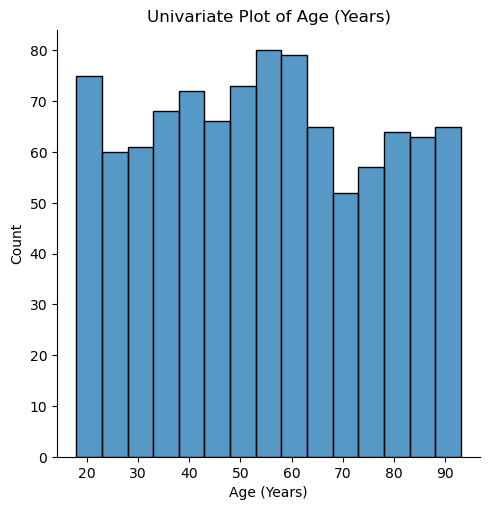

In [27]:
age_plot = sns.displot(record, x='Age (Years)', binwidth=5)
plt.title('Univariate Plot of Age (Years)')
plt.show()

### Question 2b:
- Univariate Plot for Dependants:

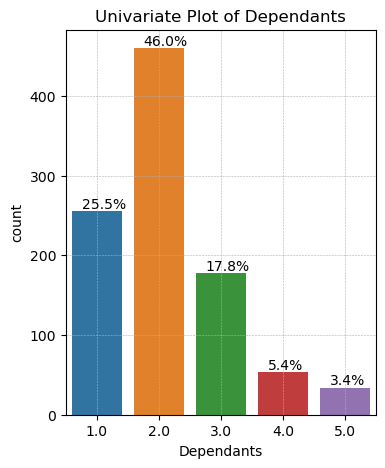

In [36]:
dependants_plot = countplot_func(data=record, main_data=record,plot_size=(4,5),xlabel='Dependants',
                                 plot_title='Univariate Plot of Dependants',plot_variable='Dependants',add_count=False)

In [37]:
type(dependants_plot)

matplotlib.axes._axes.Axes

### Question 2c:
- Univariate plot of Age feature, Conditioned with the Marital Status features:

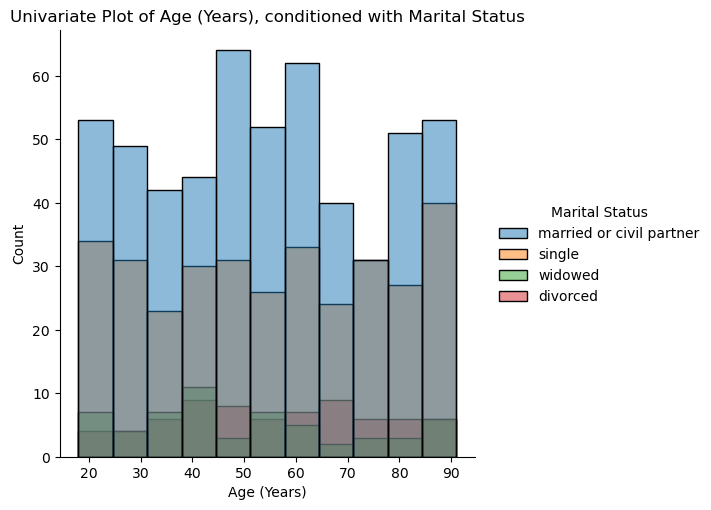

In [29]:

age_marital_status_plot = sns.displot(record, x='Age (Years)', hue='Marital Status')
plt.title('Univariate Plot of Age (Years), conditioned with Marital Status')
plt.show()

## Question 3:

### Question 3a:
- Muti-variate plot of Commuted distance against Salary:

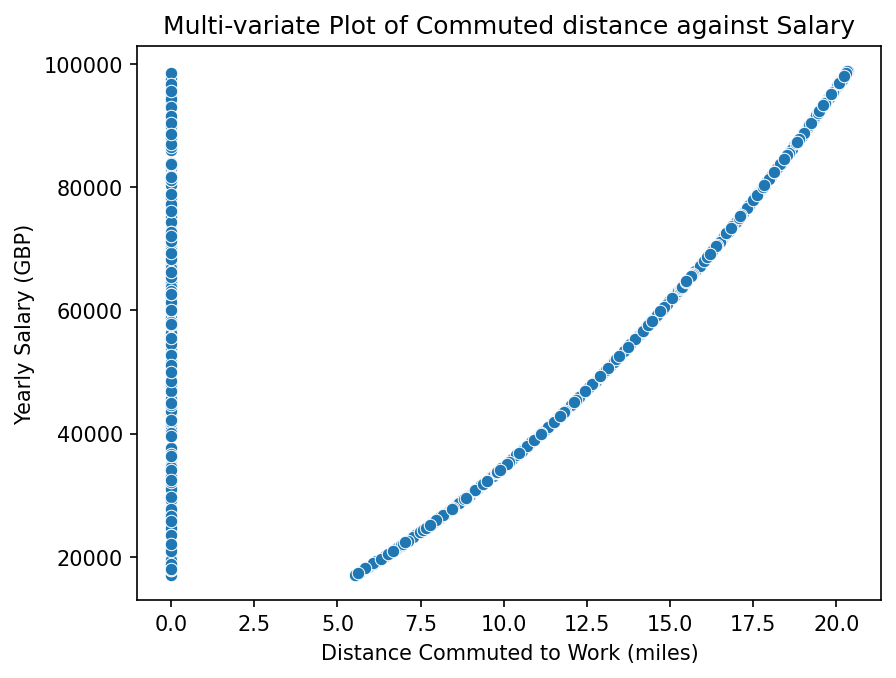

In [30]:
plt.figure(dpi=150)
distance_salary_plot = sns.scatterplot(data=record, x='Distance Commuted to Work (miles)', y='Yearly Salary (GBP)')
plt.title('Multi-variate Plot of Commuted distance against Salary')
plt.show()

### Question 3b:
- Multi-variate plot of Age against the Salary:

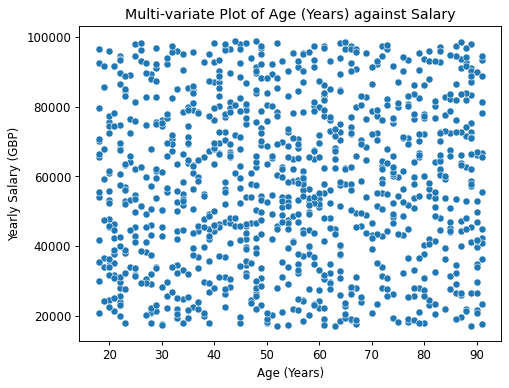

In [31]:
plt.figure(dpi=85)
age_salary_plot = sns.scatterplot(data=record, x='Age (Years)', y='Yearly Salary (GBP)')
plt.title('Multi-variate Plot of Age (Years) against Salary')
plt.show()

### Question 3c:
- Multi-variate plot of Age against Salary, conditioned by the number of Dependants:

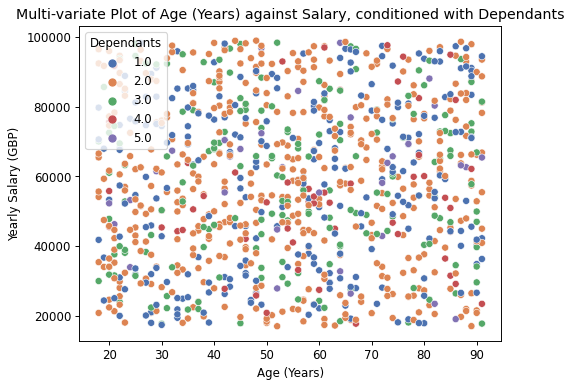

In [32]:
plt.figure(dpi=85)
age_salary_dependants_plot = sns.scatterplot(data=record, x='Age (Years)', y='Yearly Salary (GBP)', hue='Dependants',palette='deep')
plt.title('Multi-variate Plot of Age (Years) against Salary, conditioned with Dependants')
plt.show()

## Question 4:

### Saving plots to directory:

In [41]:
#Creating dictionaries to store details of the Univariate and Multi-variate plots

image_save_Univariate = {}
image_save_Multi = {}

#Univariate:
image_save_Univariate['./Age_Uni.png'] = age_plot
#image_save_Univariate['./Dependants_Uni.png'] = dependants_plot
image_save_Univariate['./Age_Marital_Uni.png'] = age_marital_status_plot

#Multivariate:
image_save_Multi['./Distance_Salary_Multi.png'] = distance_salary_plot
image_save_Multi['./Age_Salary_Multi.png'] = age_salary_plot
image_save_Multi['./Age_Salary_dependants_Multi.png'] = age_salary_dependants_plot

#Saving the images for both Univariate plots:
for image1 in image_save_Univariate:
    image_fig1 = image_save_Univariate[image1]
    image_fig1.savefig(image1)
    
#Saving the images for Multi-variate plots:    
for image2 in image_save_Multi:
    image_fig = image_save_Multi[image2]
    image_fig.get_figure().savefig(image2)